<a href="https://colab.research.google.com/github/Muneeb-git-hub/Task-3/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling (1).csv to Churn_Modelling (1).csv


In [2]:
# imporrting library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
# Load Data

df = pd.read_csv("Churn_Modelling (1).csv")  # update path if needed

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Drop unnecessary columns
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])



In [7]:
# Check missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [8]:
# Separate Features and Target

X = df.drop(columns=['Exited'])   # Exited = churn (0 = No, 1 = Yes)
y = df['Exited']

In [9]:
# Encode Categorical Feature

# Columns to encode
categorical_cols = ['Geography', 'Gender']

# OneHot Encoding
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(drop='first'), categorical_cols)  # drop first to avoid dummy trap
    ],
    remainder='passthrough'
)

X_encoded = ct.fit_transform(X)

In [10]:
#   Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [11]:
# Random Forest


clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)


In [12]:
# Evaluate the Model

accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 0.8675

Confusion Matrix:
[[1549   58]
 [ 207  186]]


In [13]:
# Feature Importance

# Extract feature names from OneHotEncoder
encoded_feature_names = (
    ct.named_transformers_['encoder']
    .get_feature_names_out(categorical_cols)
    .tolist()
)

In [14]:
# Add remaining numeric features
numeric_features = [col for col in X.columns if col not in categorical_cols]
feature_names = encoded_feature_names + numeric_features


In [15]:
#  importance values
importances = clf.feature_importances_

In [16]:
# Create dataframe
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", fi_df)



Feature Importance:
               Feature  Importance
4                 Age    0.237019
10    EstimatedSalary    0.146738
3         CreditScore    0.142674
6             Balance    0.140160
7       NumOfProducts    0.133282
5              Tenure    0.081469
9      IsActiveMember    0.041158
0   Geography_Germany    0.025438
2         Gender_Male    0.019456
8           HasCrCard    0.018851
1     Geography_Spain    0.013755


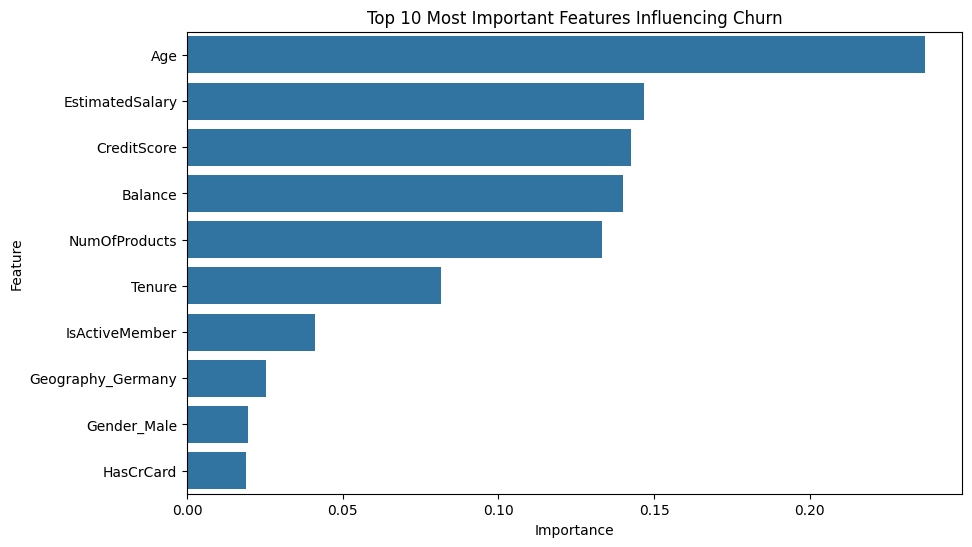

In [17]:

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=fi_df.head(10), x="Importance", y="Feature")
plt.title("Top 10 Most Important Features Influencing Churn")
plt.show()